seting up and loading dataset


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

df = pd.read_csv('Human_Development_Index_Dataset.csv')

print(df.shape)
df.head(3)
df.info()


(6798, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 6798 non-null   int64  
 1   iso3                       6798 non-null   object 
 2   country                    6798 non-null   object 
 3   year                       6798 non-null   int64  
 4   hdi                        6171 non-null   float64
 5   life_expectancy            6798 non-null   float64
 6   pop_millions               6798 non-null   float64
 7   hdi_f                      5014 non-null   float64
 8   hdi_m                      5014 non-null   float64
 9   life_expec_f               6798 non-null   float64
 10  life_expec_m               6798 non-null   float64
 11  expec_yr_school            6550 non-null   float64
 12  expec_yr_school_f          6270 non-null   float64
 13  expec_yr_school_m          6270 non-n

Problem 1A – Single year HDI exploration (2022)

1. Extract 2022 data

In [4]:
print(sorted(df['year'].unique()))

hdi_2022_df = df[df['year'] == 2022].copy()
hdi_2022_df.shape


[np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]


(206, 30)

2. Explore dataset

In [5]:
hdi_2022_df.head(10)
print("Rows, Columns:", hdi_2022_df.shape)
hdi_2022_df.dtypes


Rows, Columns: (206, 30)


Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_in_parliament_m_%      float64
labour_participation_f_%     float64
l

3. Check missing values and clean

In [6]:
hdi_2022_df.isna().sum().sort_values(ascending=False)

dup_count = hdi_2022_df.duplicated().sum()
print("Duplicates:", dup_count)
hdi_2022_df = hdi_2022_df.drop_duplicates()

if 'country' in hdi_2022_df.columns:
    hdi_2022_df['country'] = hdi_2022_df['country'].str.strip()

num_cols = ['hdi', 'gross_inc_percap', 'life_expectancy', 'gender_development']
for c in num_cols:
    if c in hdi_2022_df.columns:
        hdi_2022_df[c] = pd.to_numeric(hdi_2022_df[c], errors='coerce')

hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])


Duplicates: 0


4. Basic statistics

In [7]:
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()
print({"mean": mean_hdi, "median": median_hdi, "std": std_hdi})


{'mean': np.float64(0.7228872549019609), 'median': 0.7395, 'std': 0.15302880386427825}


5. Extremes

In [8]:
max_row = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]
min_row = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]
print("Highest HDI:", max_row['country'], max_row['hdi'])
print("Lowest HDI:", min_row['country'], min_row['hdi'])


Highest HDI: Switzerland 0.967
Lowest HDI: Somalia 0.38


6. Filter & sort (HDI ≥ 0.800; sort by GNI)

In [ ]:
high_hdi = hdi_2022_df[hdi_2022_df['hdi'] >= 0.800].copy()
if 'gross_inc_percap' in high_hdi.columns:
    top10_gni = high_hdi.sort_values('gross_inc_percap', ascending=False).head(10)
else:
    top10_gni = high_hdi.head(10)  
top10_gni[['country', 'hdi', 'gross_inc_percap']].head(10)


,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


7. Add HDI category column and save

In [ ]:
def categorize_hdi(val):
    if val < 0.550:
        return "Low"
    elif 0.550 <= val < 0.700:
        return "Medium"
    elif 0.700 <= val < 0.800:
        return "High"
    else:
        return "Very High"

hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(categorize_hdi)

hdi_2022_df['HDI_Category'].value_counts()

hdi_2022_df.to_csv('HDI_category_added.csv', index=False)


Problem 1B – Visualization & trends (2020–2022)

1. Extract and save

In [11]:
hdi_2020_2022 = df[df['year'].isin([2020, 2021, 2022])].copy()
for c in ['hdi', 'gross_inc_percap']:
    if c in hdi_2020_2022.columns:
        hdi_2020_2022[c] = pd.to_numeric(hdi_2020_2022[c], errors='coerce')
hdi_2020_2022 = hdi_2020_2022.drop_duplicates()
hdi_2020_2022 = hdi_2020_2022.dropna(subset=['hdi', 'country', 'year'])

hdi_2020_2022.to_csv('HDI_problem1B.csv', index=False)


2. Line chart: 5 countries

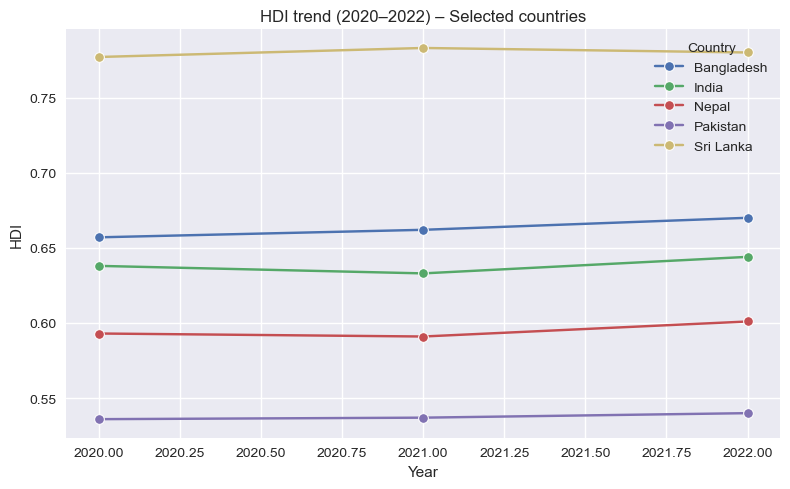

In [12]:
countries = ['Nepal', 'India', 'Bangladesh', 'Sri Lanka', 'Pakistan']  # adjust as you like
subset_c = hdi_2020_2022[hdi_2020_2022['country'].isin(countries)]

plt.figure(figsize=(8,5))
sns.lineplot(data=subset_c, x='year', y='hdi', hue='country', marker='o')
plt.title('HDI trend (2020–2022) – Selected countries')
plt.xlabel('Year'); plt.ylabel('HDI'); plt.legend(title='Country')
plt.tight_layout(); plt.show()


3. Bar chart: average HDI by region (grouped by year)

In [13]:
if 'region' in hdi_2020_2022.columns:
    region_year = (hdi_2020_2022
                   .groupby(['region','year'], as_index=False)['hdi'].mean())
    plt.figure(figsize=(10,5))
    sns.barplot(data=region_year, x='region', y='hdi', hue='year')
    plt.title('Average HDI by region (2020–2022)')
    plt.xlabel('Region'); plt.ylabel('Average HDI'); plt.xticks(rotation=30)
    plt.tight_layout(); plt.show()


4. Box plot: HDI distribution by year

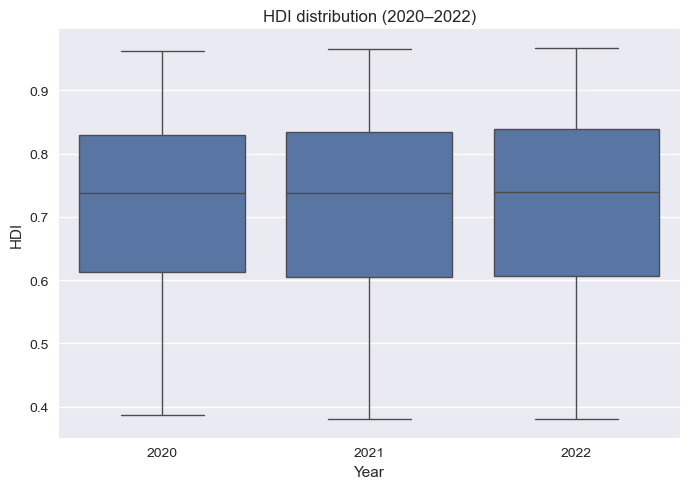

In [14]:
plt.figure(figsize=(7,5))
sns.boxplot(data=hdi_2020_2022, x='year', y='hdi')
plt.title('HDI distribution (2020–2022)')
plt.xlabel('Year'); plt.ylabel('HDI')
plt.tight_layout(); plt.show()


5. Scatter: HDI vs GNI per capita

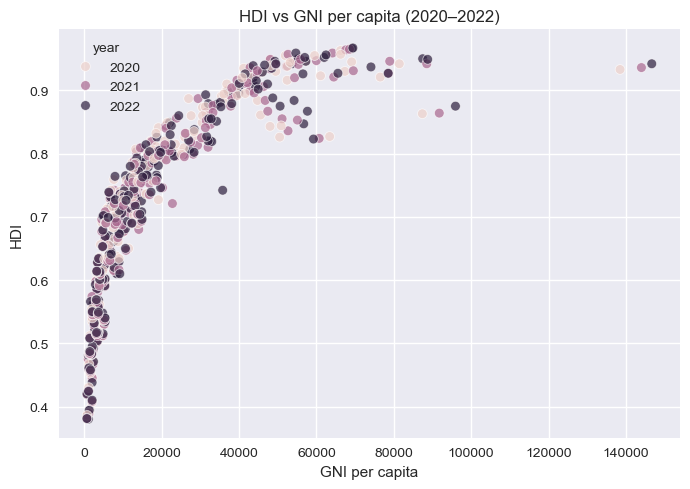

In [15]:
if 'gross_inc_percap' in hdi_2020_2022.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=hdi_2020_2022, x='gross_inc_percap', y='hdi', hue='year', alpha=0.7)
    plt.title('HDI vs GNI per capita (2020–2022)')
    plt.xlabel('GNI per capita'); plt.ylabel('HDI')
    plt.tight_layout(); plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")


6. Short analysis answers (compute helpers)

In [16]:
pivot = hdi_2020_2022.pivot_table(index='country', columns='year', values='hdi')
pivot['delta_2020_2022'] = pivot[2022] - pivot[2020]
pivot_sorted = pivot.dropna(subset=['delta_2020_2022']).sort_values('delta_2020_2022', ascending=False)
top_improvements = pivot_sorted.head(5)

declines = pivot_sorted[pivot_sorted['delta_2020_2022'] < 0].sort_values('delta_2020_2022').head(10)

if 'region' in hdi_2020_2022.columns:
    region_avg = (hdi_2020_2022.groupby('region', as_index=False)['hdi'].mean()
                  .sort_values('hdi', ascending=False))
    highest_region = region_avg.iloc[0]
    lowest_region = region_avg.iloc[-1]
    print("Highest region avg (2020–2022):", highest_region['region'], highest_region['hdi'])
    print("Lowest region avg (2020–2022):", lowest_region['region'], lowest_region['hdi'])

top_improvements.head(10), declines.head(10)


(year         2020   2021   2022  delta_2020_2022
 country                                         
 Andorra     0.843  0.855  0.884            0.041
 Azerbaijan  0.722  0.738  0.760            0.038
 Ecuador     0.734  0.746  0.765            0.031
 Maldives    0.737  0.753  0.762            0.025
 Mexico      0.757  0.757  0.781            0.024,
 year                               2020   2021   2022  delta_2020_2022
 country                                                               
 Timor-Leste                       0.633  0.574  0.566           -0.067
 Ukraine                           0.762  0.755  0.734           -0.028
 Afghanistan                       0.488  0.473  0.462           -0.026
 Namibia                           0.634  0.616  0.610           -0.024
 Lebanon                           0.742  0.725  0.723           -0.019
 Saint Vincent and the Grenadines  0.785  0.773  0.772           -0.013
 Suriname                          0.702  0.689  0.690           -0.012
 

In [ ]:
Problem 2 – Advanced HDI (South Asia)

1. Subset and save

In [17]:
south_asia = ["Afghanistan","Bangladesh","Bhutan","India","Maldives","Nepal","Pakistan","Sri Lanka"]
sa_df = df[df['country'].isin(south_asia)].copy()
sa_df.to_csv('HDI_SouthAsia.csv', index=False)


2. Composite development score and ranking

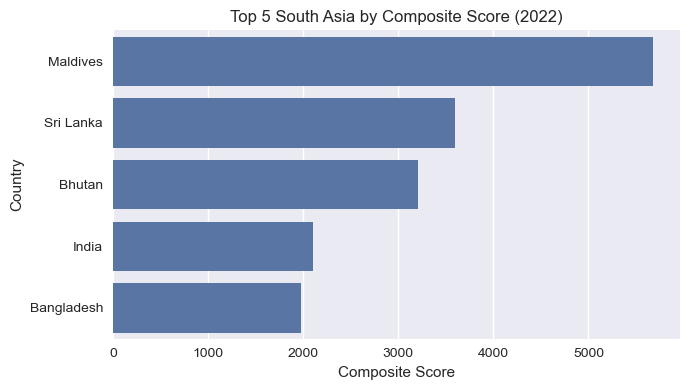

(       country    hdi
 0    Sri Lanka  0.780
 1     Maldives  0.762
 2       Bhutan  0.681
 3   Bangladesh  0.670
 4        India  0.644
 5        Nepal  0.601
 6     Pakistan  0.540
 7  Afghanistan  0.462,
        country  Composite_Score
 0     Maldives      5678.289357
 1    Sri Lanka      3592.832541
 2       Bhutan      3209.130864
 3        India      2105.481239
 4   Bangladesh      1975.446053
 5     Pakistan      1632.210427
 6        Nepal      1228.811605
 7  Afghanistan       419.425420)

In [18]:
for c in ['life_expectancy','gross_inc_percap','hdi']:
    if c in sa_df.columns:
        sa_df[c] = pd.to_numeric(sa_df[c], errors='coerce')

sa_2022 = sa_df[sa_df['year'] == 2022].copy()
sa_2022['Composite_Score'] = 0.30*sa_2022['life_expectancy'] + 0.30*sa_2022['gross_inc_percap']
rank_comp = sa_2022.sort_values('Composite_Score', ascending=False)

# Plot top 5
top5 = rank_comp.head(5)
plt.figure(figsize=(7,4))
sns.barplot(data=top5, y='country', x='Composite_Score', orient='h')
plt.title('Top 5 South Asia by Composite Score (2022)')
plt.xlabel('Composite Score'); plt.ylabel('Country')
plt.tight_layout(); plt.show()

# Compare with HDI ranking
rank_hdi = sa_2022.sort_values('hdi', ascending=False)[['country','hdi']].reset_index(drop=True)
rank_comp_compare = rank_comp[['country','Composite_Score']].reset_index(drop=True)
rank_hdi.head(8), rank_comp_compare.head(8)


3. Outlier detection (1.5 × IQR)

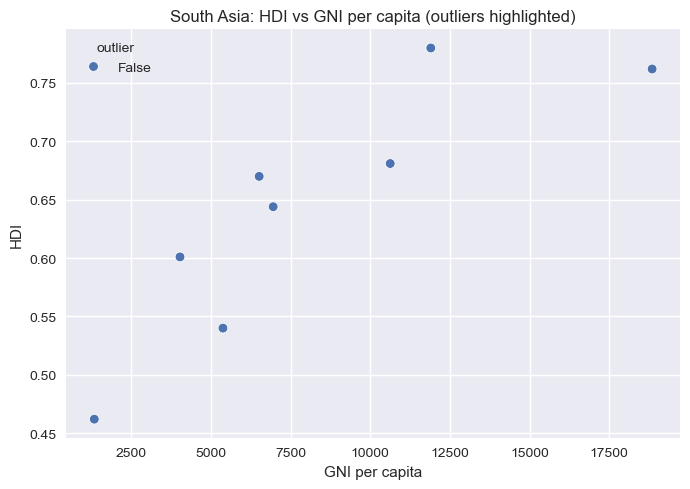

,country,hdi,gross_inc_percap


In [19]:
def iqr_outliers(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return lower, upper

sa_num = sa_2022.dropna(subset=['hdi','gross_inc_percap'])
lower_h, upper_h = iqr_outliers(sa_num['hdi'])
lower_g, upper_g = iqr_outliers(sa_num['gross_inc_percap'])

sa_num['outlier'] = ((sa_num['hdi'] < lower_h) | (sa_num['hdi'] > upper_h) |
                     (sa_num['gross_inc_percap'] < lower_g) | (sa_num['gross_inc_percap'] > upper_g))

plt.figure(figsize=(7,5))
sns.scatterplot(data=sa_num, x='gross_inc_percap', y='hdi', hue='outlier', style='outlier')
plt.title('South Asia: HDI vs GNI per capita (outliers highlighted)')
plt.xlabel('GNI per capita'); plt.ylabel('HDI')
plt.tight_layout(); plt.show()

sa_num[sa_num['outlier'] == True][['country','hdi','gross_inc_percap']]


4. Metric relationships

Pearson corr(gender_development, hdi): 0.885


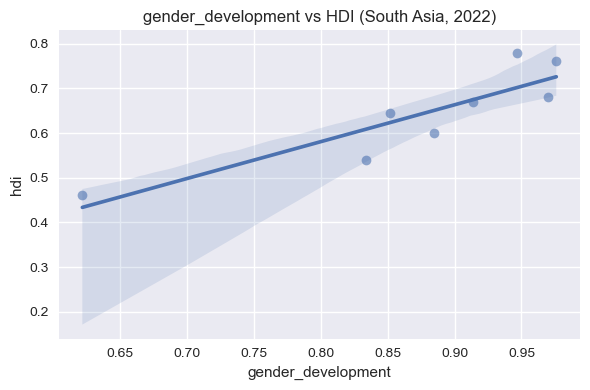

Pearson corr(life_expectancy, hdi): 0.928


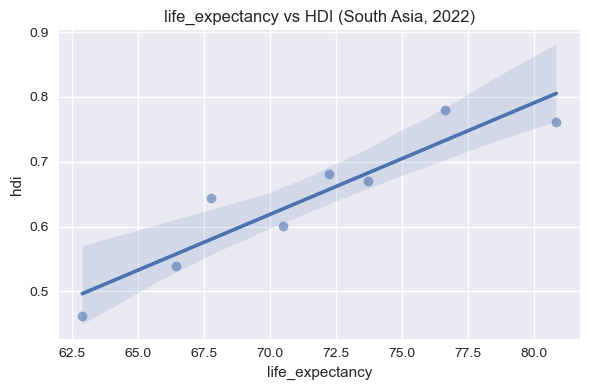

In [20]:
metrics = ['gender_development','life_expectancy']
for m in metrics:
    if m in sa_2022.columns:
        corr = sa_2022[[m, 'hdi']].dropna().corr().iloc[0,1]
        print(f"Pearson corr({m}, hdi): {corr:.3f}")
        plt.figure(figsize=(6,4))
        sns.regplot(data=sa_2022, x=m, y='hdi', scatter_kws={'alpha':0.6})
        plt.title(f'{m} vs HDI (South Asia, 2022)')
        plt.tight_layout(); plt.show()


5. Gap analysis

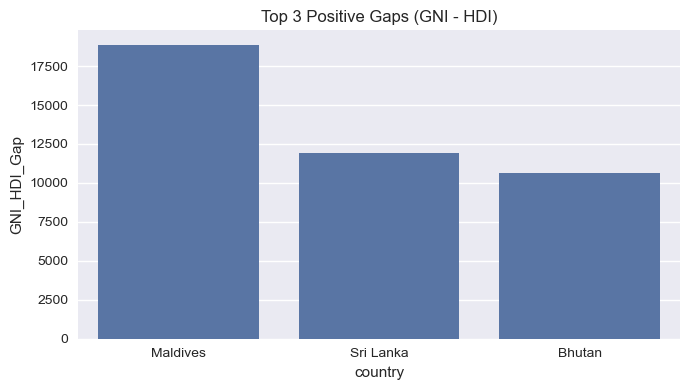

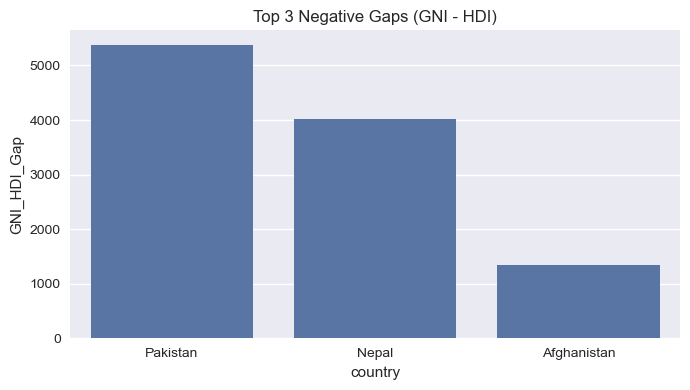

(        country  GNI_HDI_Gap
 3530   Maldives  18846.03019
 5477  Sri Lanka  11898.71847
 659      Bhutan  10624.19288,
           country  GNI_HDI_Gap
 4388     Pakistan  5373.730423
 4091        Nepal  4024.953685
 32    Afghanistan  1334.743733)

In [21]:
sa_2022['GNI_HDI_Gap'] = sa_2022['gross_inc_percap'] - sa_2022['hdi']
gap_sorted = sa_2022.sort_values('GNI_HDI_Gap', ascending=False)

top_pos = gap_sorted.head(3)
top_neg = gap_sorted.tail(3)

plt.figure(figsize=(7,4))
sns.barplot(data=top_pos, x='country', y='GNI_HDI_Gap')
plt.title('Top 3 Positive Gaps (GNI - HDI)')
plt.tight_layout(); plt.show()

plt.figure(figsize=(7,4))
sns.barplot(data=top_neg, x='country', y='GNI_HDI_Gap')
plt.title('Top 3 Negative Gaps (GNI - HDI)')
plt.tight_layout(); plt.show()

top_pos[['country','GNI_HDI_Gap']], top_neg[['country','GNI_HDI_Gap']]


Problem 3 – South Asia vs Middle East (2020–2022)

# Task 1: Add Region Column (manual mapping) # Since the dataset does not include a 'region' column, we create one manually # by mapping countries to their respective regions (South Asia, Middle East, etc.) # based on UNDP classification.

In [26]:
region_map = {
    # South Asia
    "Afghanistan": "South Asia",
    "Bangladesh": "South Asia",
    "Bhutan": "South Asia",
    "India": "South Asia",
    "Maldives": "South Asia",
    "Nepal": "South Asia",
    "Pakistan": "South Asia",
    "Sri Lanka": "South Asia",
    
    # Middle East
    "Bahrain": "Middle East",
    "Iran": "Middle East",
    "Iraq": "Middle East",
    "Israel": "Middle East",
    "Jordan": "Middle East",
    "Kuwait": "Middle East",
    "Lebanon": "Middle East",
    "Oman": "Middle East",
    "Palestine": "Middle East",
    "Qatar": "Middle East",
    "Saudi Arabia": "Middle East",
    "Syria": "Middle East",
    "United Arab Emirates": "Middle East",
    "Yemen": "Middle East"
}

# Add region column to dataset
p3['region'] = p3['country'].map(region_map)


1. Subsets and save

In [22]:
middle_east = ["Bahrain","Iran","Iraq","Israel","Jordan","Kuwait","Lebanon","Oman",
               "Palestine","Qatar","Saudi Arabia","Syria","United Arab Emirates","Yemen"]

p3 = hdi_2020_2022.copy()
sa_p3 = p3[p3['country'].isin(south_asia)].copy()
me_p3 = p3[p3['country'].isin(middle_east)].copy()

sa_p3.to_csv('HDI_SouthAsia_2020_2022.csv', index=False)
me_p3.to_csv('HDI_MiddleEast_2020_2022.csv', index=False)


2. Descriptive stats

In [23]:
sa_stats = sa_p3.groupby('year')['hdi'].agg(['mean','std'])
me_stats = me_p3.groupby('year')['hdi'].agg(['mean','std'])
sa_stats, me_stats


(          mean       std
 year                    
 2020  0.637625  0.096939
 2021  0.638625  0.104200
 2022  0.642500  0.107062,
           mean       std
 year                    
 2020  0.787818  0.143401
 2021  0.786909  0.145832
 2022  0.792000  0.148453)

3. Top & bottom performers (by HDI)

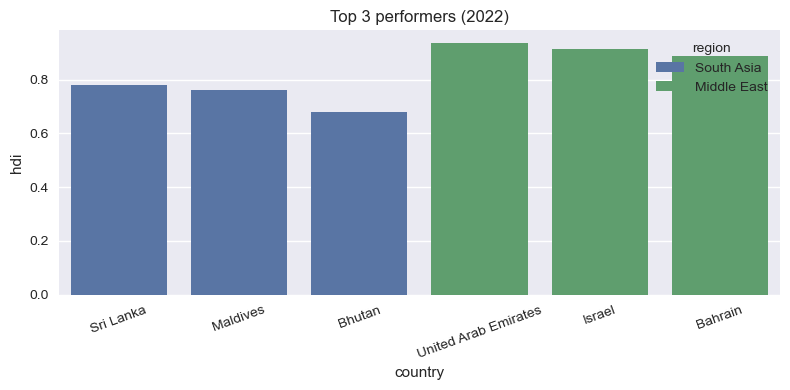

In [24]:
def top_bottom(df_region, year=2022, k=3):
    d = df_region[df_region['year']==year].dropna(subset=['hdi'])
    topk = d.sort_values('hdi', ascending=False).head(k)
    bottomk = d.sort_values('hdi', ascending=True).head(k)
    return topk[['country','hdi']], bottomk[['country','hdi']]

sa_top, sa_bottom = top_bottom(sa_p3, 2022, 3)
me_top, me_bottom = top_bottom(me_p3, 2022, 3)

# Simple bar chart compare
plt.figure(figsize=(8,4))
sns.barplot(data=pd.concat([sa_top.assign(region='South Asia'),
                            me_top.assign(region='Middle East')]),
            x='country', y='hdi', hue='region')
plt.title('Top 3 performers (2022)')
plt.xticks(rotation=20); plt.tight_layout(); plt.show()


4. Metric comparisons

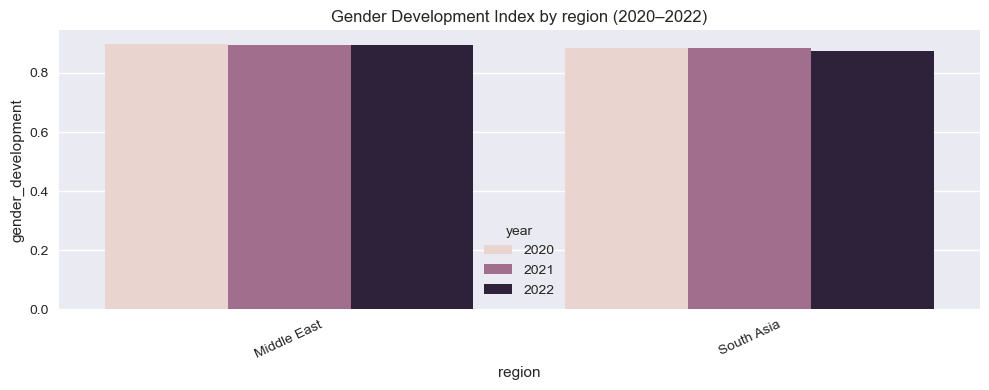

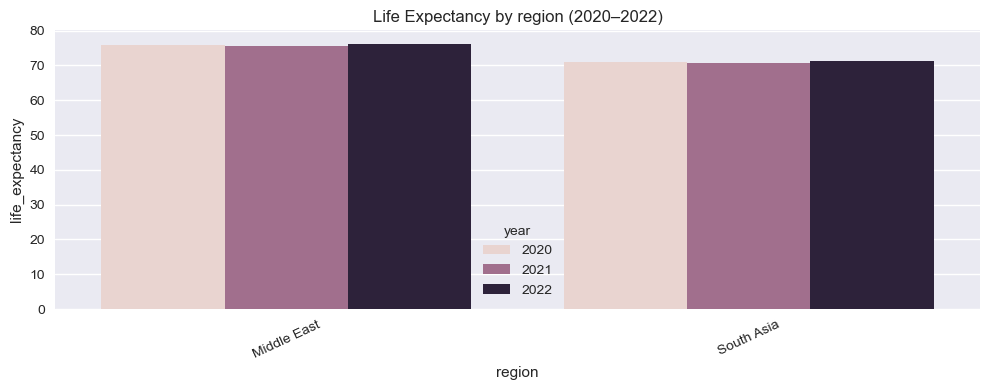

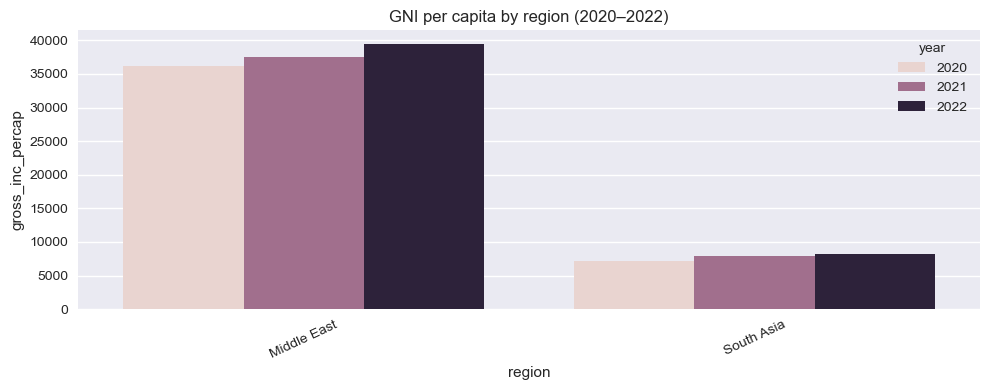

In [27]:
metrics = {'gender_development':'Gender Development Index',
           'life_expectancy':'Life Expectancy',
           'gross_inc_percap':'GNI per capita'}

for col, label in metrics.items():
    if col in p3.columns:
        comp = (p3.dropna(subset=[col])
                  .groupby(['region','year'], as_index=False)[col].mean())
        plt.figure(figsize=(10,4))
        sns.barplot(data=comp, x='region', y=col, hue='year')
        plt.title(f'{label} by region (2020–2022)')
        plt.xticks(rotation=25); plt.tight_layout(); plt.show()


Task 5: HDI Disparity

In [ ]:
range_sa = sa_p3['hdi'].max() - sa_p3['hdi'].min()
range_me = me_p3['hdi'].max() - me_p3['hdi'].min()

cv_sa = sa_p3['hdi'].std() / sa_p3['hdi'].mean()
cv_me = me_p3['hdi'].std() / me_p3['hdi'].mean()

print("South Asia HDI Range:", range_sa, "Coefficient of Variation:", cv_sa)
print("Middle East HDI Range:", range_me, "Coefficient of Variation:", cv_me)


South Asia HDI Range: 0.321 Coefficient of Variation: 0.1536520924690084
Middle East HDI Range: 0.5130000000000001 Coefficient of Variation: 0.17910145193048382


Task 6: Correlation Analysis

South Asia correlations:
HDI vs Gender Development: 0.8742177004831327
HDI vs Life Expectancy: 0.9387641385416623

Middle East correlations:
HDI vs Gender Development: 0.9356697525724119
HDI vs Life Expectancy: 0.9331227568940162


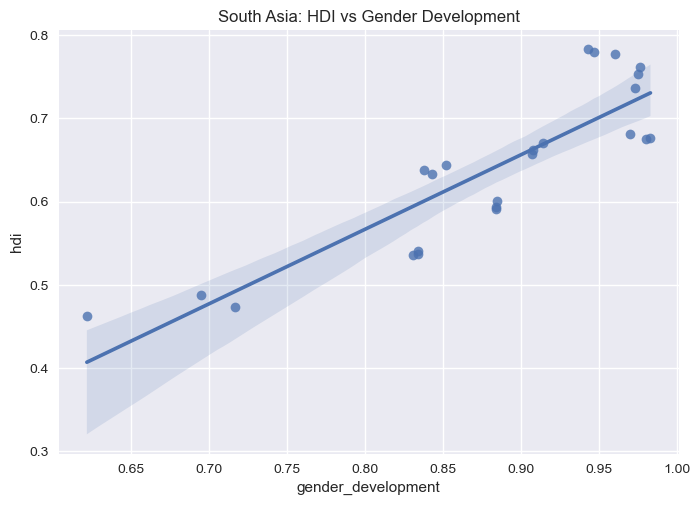

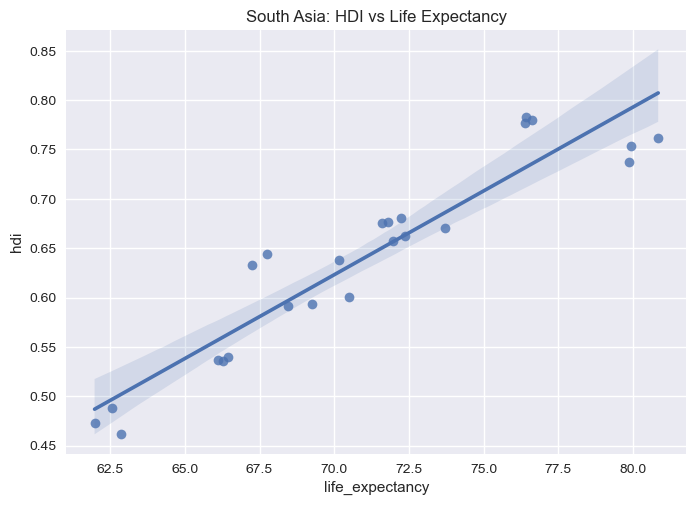

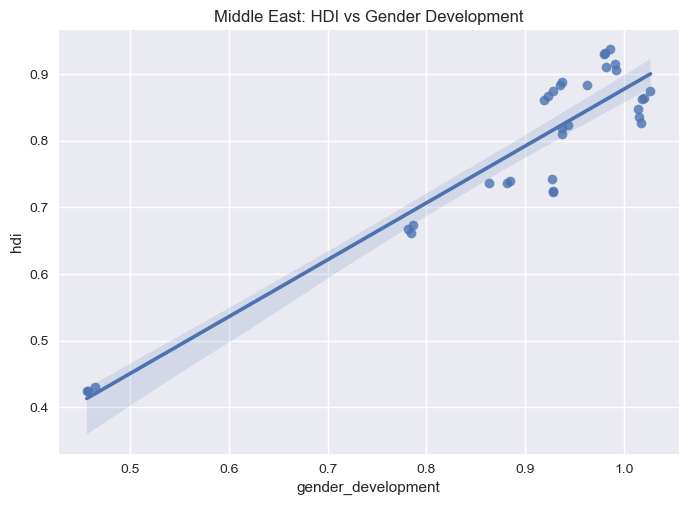

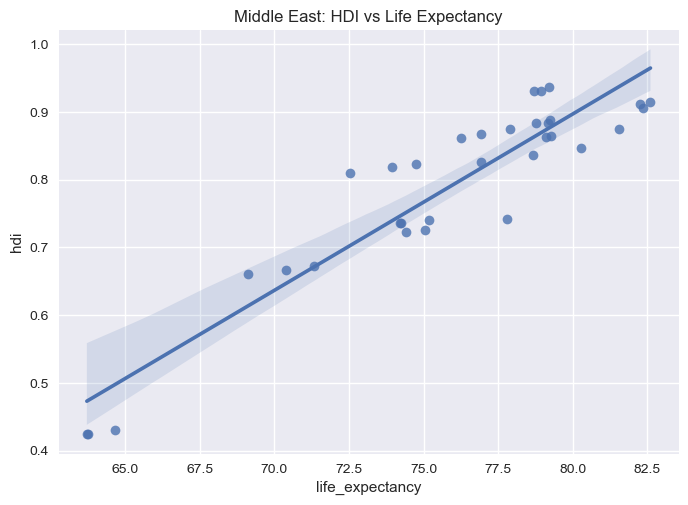

In [30]:
print("South Asia correlations:")
print("HDI vs Gender Development:", sa_p3['hdi'].corr(sa_p3['gender_development']))
print("HDI vs Life Expectancy:", sa_p3['hdi'].corr(sa_p3['life_expectancy']))

print("\nMiddle East correlations:")
print("HDI vs Gender Development:", me_p3['hdi'].corr(me_p3['gender_development']))
print("HDI vs Life Expectancy:", me_p3['hdi'].corr(me_p3['life_expectancy']))

sns.regplot(data=sa_p3, x="gender_development", y="hdi")
plt.title("South Asia: HDI vs Gender Development")
plt.show()

sns.regplot(data=sa_p3, x="life_expectancy", y="hdi")
plt.title("South Asia: HDI vs Life Expectancy")
plt.show()

sns.regplot(data=me_p3, x="gender_development", y="hdi")
plt.title("Middle East: HDI vs Gender Development")
plt.show()

sns.regplot(data=me_p3, x="life_expectancy", y="hdi")
plt.title("Middle East: HDI vs Life Expectancy")
plt.show()


Task 7: Outlier Detection using IQR

South Asia Outliers:
 Empty DataFrame
Columns: [country, year, hdi]
Index: []

Middle East Outliers:
      country  year    hdi
6366   Yemen  2020  0.430
6367   Yemen  2021  0.425
6368   Yemen  2022  0.424


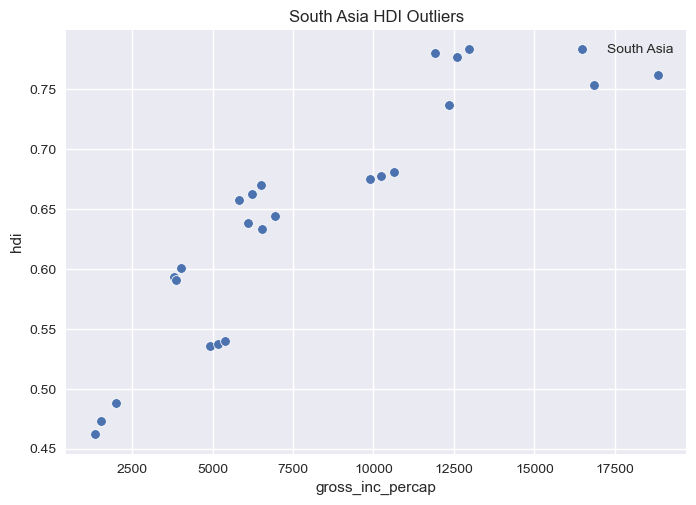

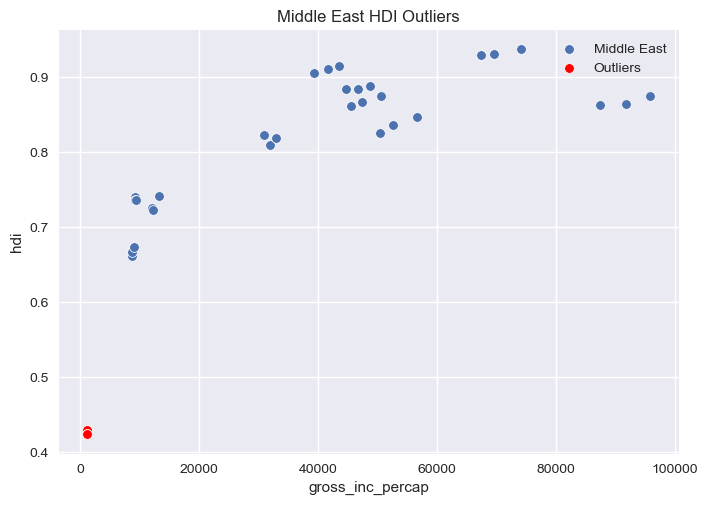

In [31]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]

outliers_sa = detect_outliers(sa_p3, 'hdi')
outliers_me = detect_outliers(me_p3, 'hdi')

print("South Asia Outliers:\n", outliers_sa[['country','year','hdi']])
print("\nMiddle East Outliers:\n", outliers_me[['country','year','hdi']])

sns.scatterplot(data=sa_p3, x="gross_inc_percap", y="hdi", label="South Asia")
sns.scatterplot(data=outliers_sa, x="gross_inc_percap", y="hdi", color="red", label="Outliers")
plt.title("South Asia HDI Outliers")
plt.show()

sns.scatterplot(data=me_p3, x="gross_inc_percap", y="hdi", label="Middle East")
sns.scatterplot(data=outliers_me, x="gross_inc_percap", y="hdi", color="red", label="Outliers")
plt.title("Middle East HDI Outliers")
plt.show()
